In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
data = pd.read_csv("Library_Usage.csv")
data.head(1)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN


#### What attributes are most associated with library activity (# of checkouts, # of renewals)?

I suspect that the year of enrolment would be correlated with library activity

first let's see what is the distribution of member enrolments per year.

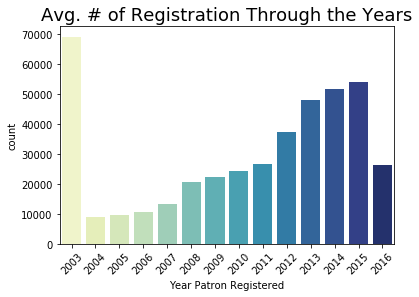

In [4]:
years = list(range(2003,2017))
member_count = pd.DataFrame({'count' : data.groupby(["Year Patron Registered"]).size()}).reset_index()
ax = sns.barplot(x = "Year Patron Registered",y = "count", data = member_count, order = years, palette = "YlGnBu")
ax = plt.xticks(rotation = 45)
ax = plt.title("Avg. # of Registration Through the Years", fontsize = 18)

plt.show()

The number of enrolled Patrons has an increasing trend over the years. However, 2003 and 2016 are the two outliers. The enrollment boom in 2003 is most probably due to the transition to the digital archiving. They may have set existing members' registration year to 2003. The enrolment decay in 2016 may be explained by the records being incomplete.



In [5]:
month_dict = {"January":"1_", "February":"2_", "March":"3_", "April":"4_", "May":"5_", "June":"6_", "July":"7_", "August":"8_",\
              "September":"9_","October":"10_", "November":"11_", "December":"12_"}

data["Circulation Active Date"] = data["Circulation Active Month"].map(month_dict)  + data["Circulation Active Year"]
data[data["Circulation Active Year"] == "2016"]["Circulation Active Month"].unique()

array(['February', 'July', 'March', 'May', 'June', 'January', 'April'], dtype=object)

we are right the 2016 records are upto July.

then lets see how the library activity is distributed over the years

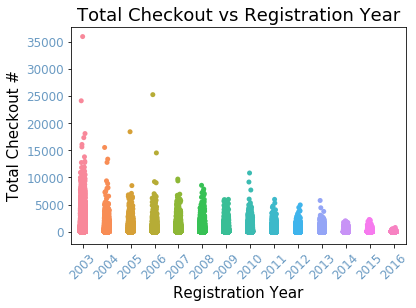

In [9]:
ax = sns.stripplot(x = "Year Patron Registered", y = "Total Checkouts", data = data, jitter=True)
ax = plt.xticks(fontsize = 12,color="steelblue", alpha=0.8, rotation = 45)
ax = plt.yticks(fontsize = 12,color="steelblue", alpha=0.8)
ax = plt.xlabel("Registration Year", fontsize = 15)
ax = plt.ylabel("Total Checkout #", fontsize = 15)
ax = plt.title("Total Checkout vs Registration Year", fontsize = 18)


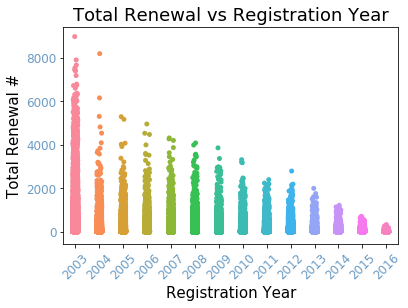

In [10]:
ax = sns.stripplot(x = "Year Patron Registered", y = "Total Renewals", data = data, jitter=True)
ax = plt.xticks(fontsize = 12,color="steelblue", alpha=0.8, rotation = 45)
ax = plt.yticks(fontsize = 12,color="steelblue", alpha=0.8)
ax = plt.xlabel("Registration Year",fontsize = 15)
ax = plt.ylabel("Total Renewal #",fontsize = 15)
ax = plt.title("Total Renewal vs Registration Year",fontsize = 18)


As one can see from the above 2 plots and the correlation grid below there is:

* -0.36 correlation between "Total Checkout and Registration Year"
* -0.29 correlation between "Total Renewal and Registration Year"


Even though the majority of the members have relatively low library activity, when we filter out the less active members (such as members with renewal< 2000 xor checkout < 5000) the correlations get weaker. That's why we will keep all members

Let's assign a representative (numerical) age per "Age Range" and check the correlation between every parameter in our dataset

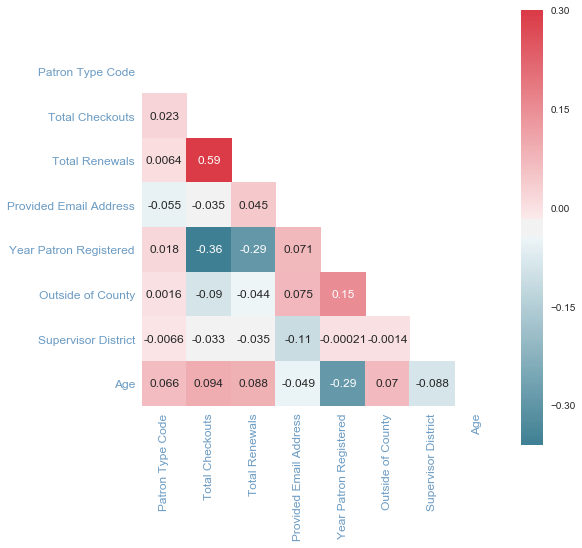

In [11]:
dict_age = {'0 to 9 years' : 5, '10 to 19 years' : 15, '20 to 24 years' : 22, '25 to 34 years' : 30, \
            '35 to 44 years': 40, '45 to 54 years' : 50, '55 to 59 years' : 57,'60 to 64 years' : 62, '65 to 74 years' : 70,\
            '75 years and over': 80}
data["Age"] = data["Age Range"].map(dict_age)

def display_corr(values, size):
    sns.set(style="white")

    #the correlation matrix
    corr = values.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=True,cmap=cmap, vmax=.3,
            square=True,  ax=ax)
    ax = plt.xticks(fontsize = 12,color="steelblue", alpha=0.8, rotation=90)
    ax = plt.yticks(fontsize = 12,color="steelblue", alpha=0.8)
    
display_corr(data, 8)

* As expected, the most correlated parameter couple is "Total Checkout" and "Total Renewals".
* Apart from that, Age is highly (negatively) correlated with Year Patron Registered, which makes sense. Older people may be registered earlier than the toddlers for example, or family may have registered later than the seniors.
* Age is more or less (weakly) correlated with everything. Patron Type groups are formed regarding the Age and senior people had more chance to checkout/renew books compared to the younger peers.
* Outside of Country is related with Year Patron Registered. This one deserves a closer look:

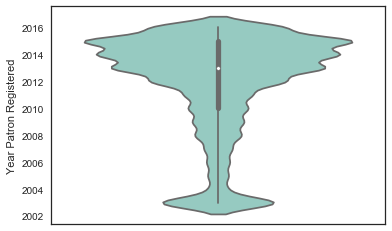

In [12]:
sns.violinplot(y="Year Patron Registered", data=data[data["Outside of County"] == True], split = True, palette="Set3")